In [1]:
import pandas as pd
import yfinance as yf

In [2]:
df = yf.download('^GSPC', '1926-01-01', '2023-8-18')
display(df)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2023-08-11,4450.689941,4476.229980,4443.979980,4464.049805,4464.049805,3753290000
2023-08-14,4458.129883,4490.330078,4453.439941,4489.720215,4489.720215,3896410000
2023-08-15,4478.870117,4478.870117,4432.189941,4437.859863,4437.859863,3832250000


In [3]:
df = df['Close']
df = df.reset_index()
pd.to_datetime(df['Date'])
df.head(3)

,Date,Close
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999


In [4]:
# Filter for rows corresponding to midterm election years:
midterm_years = df[(df['Date'].dt.year % 4 == 2)]['Date'].dt.year

In [5]:
# Group data into 9-month periods from end Sept. of each midterm election year:
df_mtm = pd.DataFrame()
for year in midterm_years:
    start_date = pd.to_datetime(f"{year}-11-18")
    end_date = start_date + pd.DateOffset(months=9)
    filtered_data = df[(df['Date'] >= start_date) & (df['Date'] < end_date)]
    if not filtered_data.empty:
        start_price = filtered_data.iloc[0]['Close']
        end_price = filtered_data.iloc[-1]['Close']
        simple_return = round(((end_price - start_price) / start_price) * 100, 1)
        df_mtm.loc[year, 'Year'] = year
        df_mtm.loc[year, 'Start Date'] = start_date
        df_mtm.loc[year, 'End Date'] = end_date
        df_mtm.loc[year, 'Simple Return %'] = simple_return
        
df_mtm = df_mtm.astype({'Year':'int'})                                                       
df_mtm.reset_index(drop=True, inplace=True)

print(df_mtm)

    Year Start Date   End Date  Simple Return %
0   1930 1930-11-18 1931-08-18            -15.7
1   1934 1934-11-18 1935-08-18             16.7
2   1938 1938-11-18 1939-08-18             -9.9
3   1942 1942-11-18 1943-08-18             26.4
4   1946 1946-11-18 1947-08-18              6.9
5   1950 1950-11-18 1951-08-18             15.1
6   1954 1954-11-18 1955-08-18             25.3
7   1958 1958-11-18 1959-08-18             11.4
8   1962 1962-11-18 1963-08-18             19.5
9   1966 1966-11-18 1967-08-18             16.5
10  1970 1970-11-18 1971-08-18             20.8
11  1974 1974-11-18 1975-08-18             24.7
12  1978 1978-11-18 1979-08-18             13.7
13  1982 1982-11-18 1983-08-18             19.5
14  1986 1986-11-18 1987-08-18             41.1
15  1990 1990-11-18 1991-08-18             20.7
16  1994 1994-11-18 1995-08-18             21.1
17  1998 1998-11-18 1999-08-18             17.4
18  2002 2002-11-18 2003-08-18             10.0
19  2006 2006-11-18 2007-08-18          


Midterm Miracle % positive outcomes since 1930: 87.50%



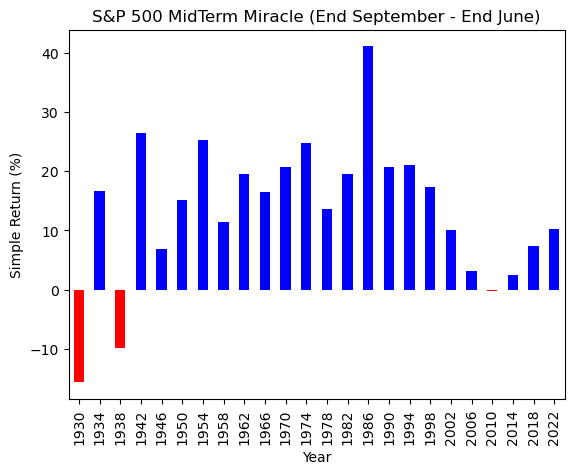

In [6]:
# Find and print the percentage of MtM years with positive returns:
pct_positive = len(df_mtm[df_mtm['Simple Return %'] > 0]) / len(df_mtm) * 100
start = midterm_years.values[0]  # Find the first midterm year in dataset.

print(f"\nMidterm Miracle % positive outcomes since {start}: \
{pct_positive:.2f}%\n")

# Plot each year's Simple Return as a bar chart:
df_mtm.plot(kind='bar',
            x='Year', 
            y='Simple Return %', 
            color=(df_mtm['Simple Return %'] > 0).map({True: 'blue',
                                                       False: 'red'}),
            title='S&P 500 MidTerm Miracle (End September - End June)', 
            legend=False,
            ylabel='Simple Return (%)');

In [7]:
# Make new DataFrame with daily data for MtM periods:
df_mtm_days = pd.DataFrame()
for year in midterm_years:
    start_date = pd.to_datetime(f"{year}-9-30")
    end_date = start_date + pd.DateOffset(months=9)
    filtered_data = df[(df['Date'] >= start_date) & (df['Date'] < end_date)]
    df_mtm_days = pd.concat([filtered_data, df_mtm_days])

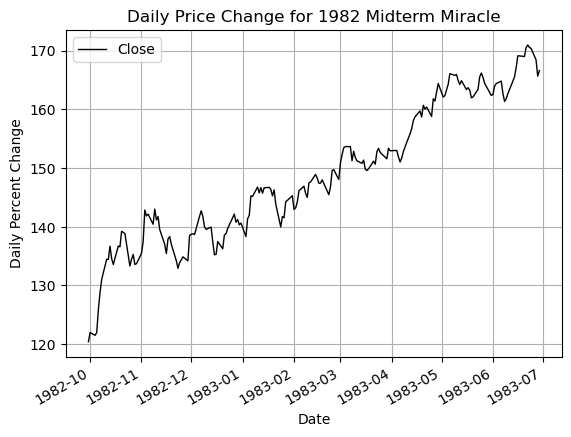

In [8]:
start_year = 1982
end_year = start_year + 1
df_temp = (df_mtm_days[(df_mtm_days['Date'].dt.year >= start_year) & 
                       (df_mtm_days['Date'].dt.year <= end_year)])
df_temp.plot(x='Date', y='Close', 
             title=f"Daily Price Change for {start_year} Midterm Miracle",
             ylabel='Daily Percent Change',
             lw=1,  
             color='k',
             grid=True);

In [9]:
df_mtm_days['Date'].dt.year.sort_values(ascending=True).unique()

array([1930, 1931, 1934, 1935, 1938, 1939, 1942, 1943, 1946, 1947, 1950,
       1951, 1954, 1955, 1958, 1959, 1962, 1963, 1966, 1967, 1970, 1971,
       1974, 1975, 1978, 1979, 1982, 1983, 1986, 1987, 1990, 1991, 1994,
       1995, 1998, 1999, 2002, 2003, 2006, 2007, 2010, 2011, 2014, 2015,
       2018, 2019, 2022, 2023], dtype=int64)

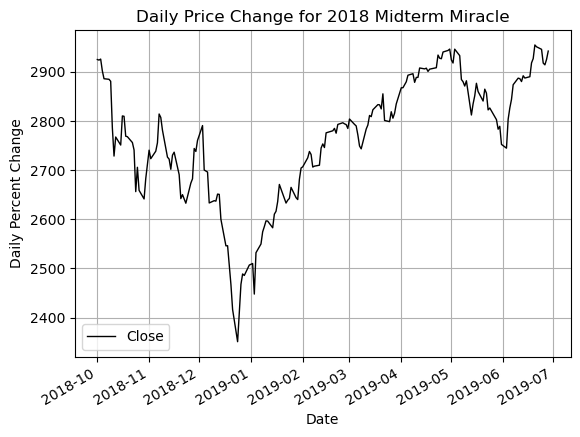

In [10]:
start_year = 2018
end_year = start_year + 1
df_temp = (df_mtm_days[(df_mtm_days['Date'].dt.year >= start_year) & 
                       (df_mtm_days['Date'].dt.year <= end_year)])
df_temp.plot(x='Date', y='Close', 
             title=f"Daily Price Change for {start_year} Midterm Miracle",
             ylabel='Daily Percent Change',
             lw=1,  
             color='k',
             grid=True);

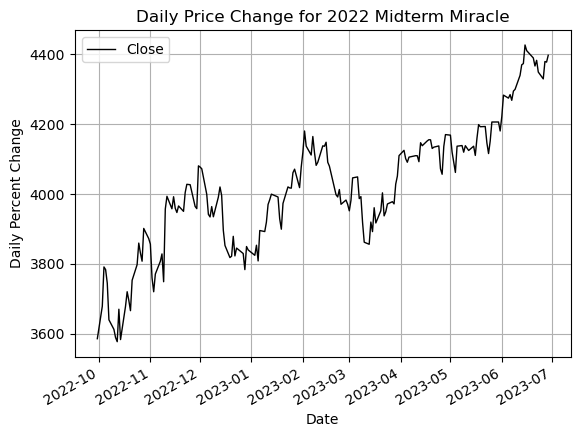

In [11]:
start_year = 2022
end_year = start_year + 1
df_temp = (df_mtm_days[(df_mtm_days['Date'].dt.year >= start_year) & 
                       (df_mtm_days['Date'].dt.year <= end_year)])
df_temp.plot(x='Date', y='Close', 
             title=f"Daily Price Change for {start_year} Midterm Miracle",
             ylabel='Daily Percent Change',
             lw=1,  
             color='k',
             grid=True);